In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import numpy as np
import utils
import model.net as net
import model.data_loader as data_loader
import model.resnet as resnet
import model.wrn as wrn
import model.densenet as densenet
import model.resnext as resnext
import model.preresnet as preresnet

In [28]:
torch.manual_seed(42)

json_path = os.path.join('./experiments/base_cnn', 'params.json')
assert os.path.isfile(json_path), "No json configuration file found at {}".format(json_path)
params = utils.Params(json_path)
params.cuda = torch.cuda.is_available()
class_name = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
model = net.Net(params).cuda() if params.cuda else net.Net(params)
distill_model = net.Net(params).cuda() if params.cuda else net.Net(params)

In [30]:
model.load_state_dict(torch.load('experiments/base_cnn/best.pth'))
distill_model.load_state_dict(torch.load('experiments/cnn_distill/best.pth'))

<All keys matched successfully>

In [31]:
test_dl = data_loader.fetch_dataloader('test', params)

Files already downloaded and verified
Files already downloaded and verified


In [32]:
for idx, (data, label) in enumerate(test_dl):
    if idx == 10:
        data = data.to('cuda')
        label = label
        predict = model(data)
        distill_predict = distill_model(data)
        break

In [33]:
class_predict = torch.argmax(predict, dim=1).detach().cpu()
class_distill_predict = torch.argmax(distill_predict, dim=1).detach().cpu()
print(class_predict[: 10], class_distill_predict[: 10], label[: 10])

tensor([8, 6, 6, 7, 0, 1, 0, 0, 4, 2]) tensor([9, 6, 6, 7, 0, 1, 0, 9, 2, 4]) tensor([9, 6, 6, 7, 0, 1, 0, 1, 3, 2])


In [34]:
plot_data = data[: 10].detach().cpu().numpy()
plot_data = np.transpose(plot_data, (0, 2, 3, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

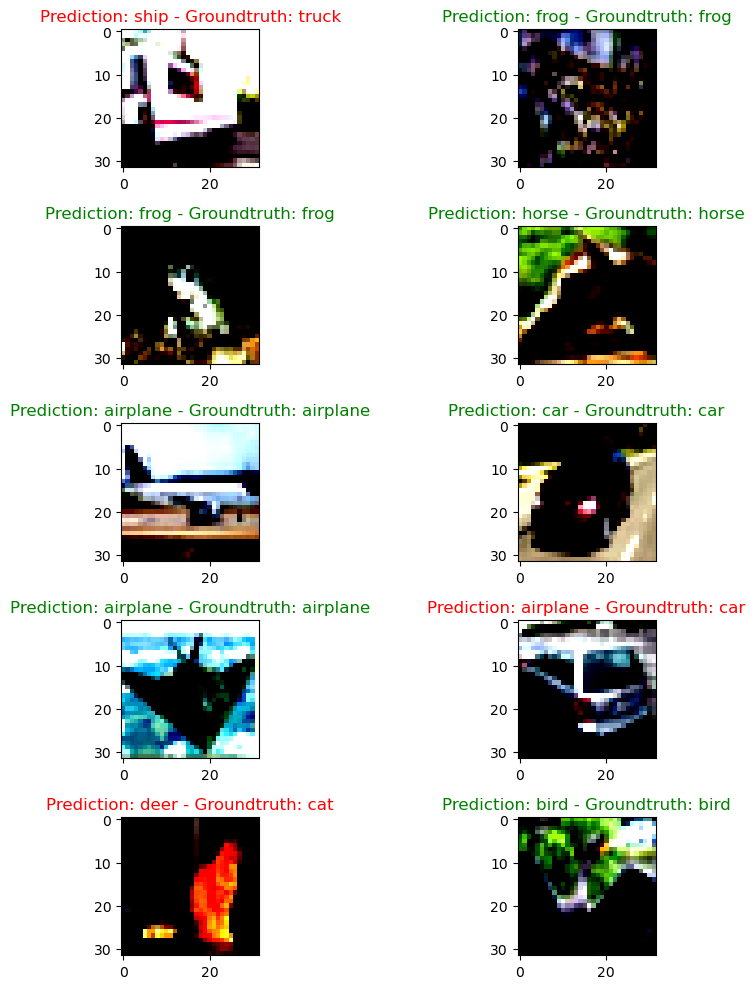

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(plot_data[i])
    if class_name[class_predict[i]] == class_name[label[i]]:
        axes[i].set_title(f'Prediction: {class_name[class_predict[i]]} - Groundtruth: {class_name[label[i]]}', color='green')
    else:
        axes[i].set_title(f'Prediction: {class_name[class_predict[i]]} - Groundtruth: {class_name[label[i]]}', color='red')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

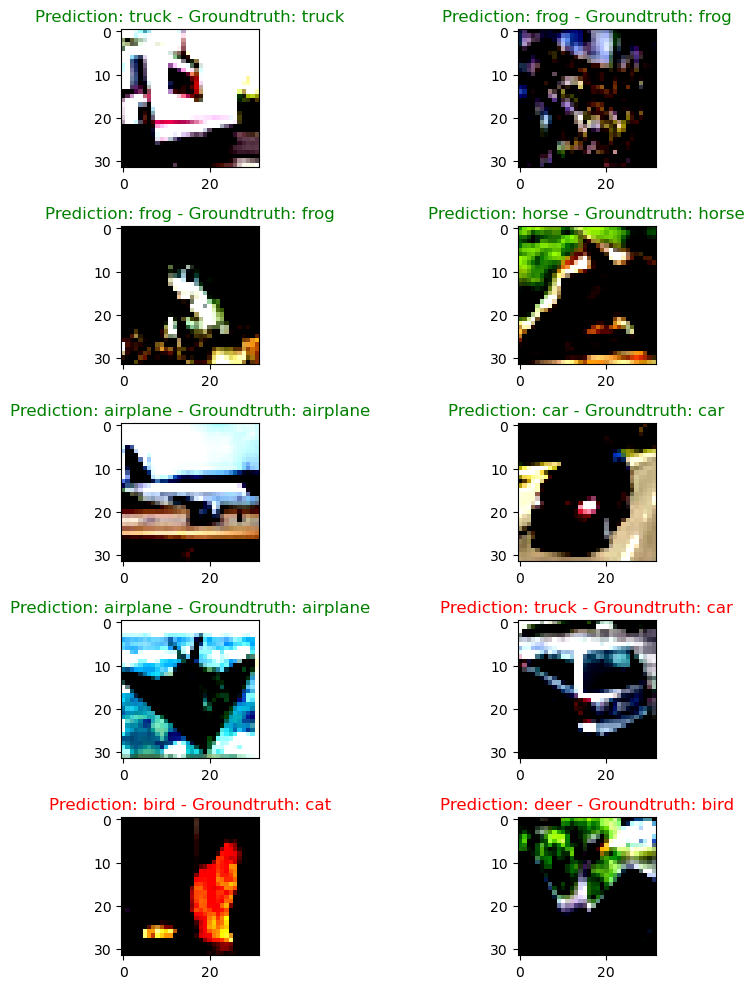

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(plot_data[i])
    if class_name[class_distill_predict[i]] == class_name[label[i]]:
        axes[i].set_title(f'Prediction: {class_name[class_distill_predict[i]]} - Groundtruth: {class_name[label[i]]}', color='green')
    else:
        axes[i].set_title(f'Prediction: {class_name[class_distill_predict[i]]} - Groundtruth: {class_name[label[i]]}', color='red')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show();